In [2]:
using Revise
using MatrixMarket
using Plots
using Interact

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1273


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10771755222784104666\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12771629881052167457\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10771755222784104666\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-9330384167821372193\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14983594969584459329\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-9330384167821372193\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
## load data
using MatrixMarket
data = cd("data/natalia191219") do 
    map(MatrixMarket.mmread, readdir())
end;

In [8]:
data = cd("data/natalia191219") do 
    @show readdir()
end;

readdir() = ["t1.mtx", "t10.mtx", "t11.mtx", "t12.mtx", "t13.mtx", "t14.mtx", "t15.mtx", "t16.mtx", "t17.mtx", "t18.mtx", "t19.mtx", "t2.mtx", "t20.mtx", "t21.mtx", "t22.mtx", "t23.mtx", "t24.mtx", "t3.mtx", "t4.mtx", "t5.mtx", "t6.mtx", "t7.mtx", "t8.mtx", "t9.mtx"]


In [4]:
function extractquiver(dt)
    xs = []
    ys = []
    dxs = []
    dys = []
    for x = 1:30, y=1:30
        push!(xs, x)
        push!(ys, y)
        dx = 0
        dy = 0
        x < 30 && (dx += dt[x,y,x+1,y])
        x > 1  && (dx -= dt[x,y,x-1,y])
        y < 30 && (dy += dt[x,y,x,y+1])
        y > 1  && (dy -= dt[x,y,x,y-1])
        push!(dxs, dx)
        push!(dys, dy)
    end
    xs, ys, dxs, dys
end

extractquiver (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /Users/alex/Desktop/code/generators/tmp.gif
└ @ Plots /Users/alex/.julia/packages/Plots/RsO3g/src/animation.jl:98


Plots.AnimatedGif("/Users/alex/Desktop/code/generators/tmp.gif")
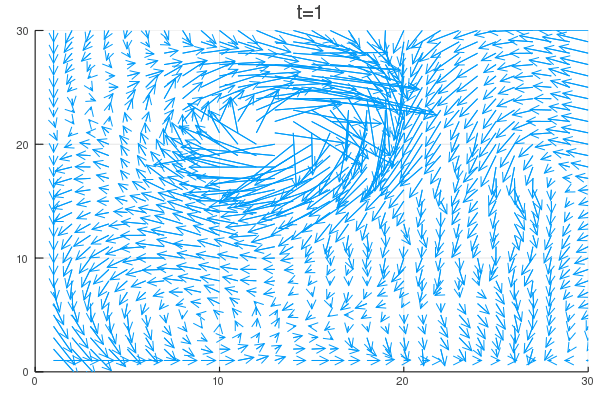

In [4]:
anim = @animate for t=1:24
    dt = reshape(data[t], 30, 30, 30, 30)
    xs,ys,dxs,dys = extractquiver(dt)
    quiver(xs, ys,quiver=(dxs,dys)./3, title="t=$t", xlims=(0,30), ylims=(0,30))
end
gif(anim, fps=6)

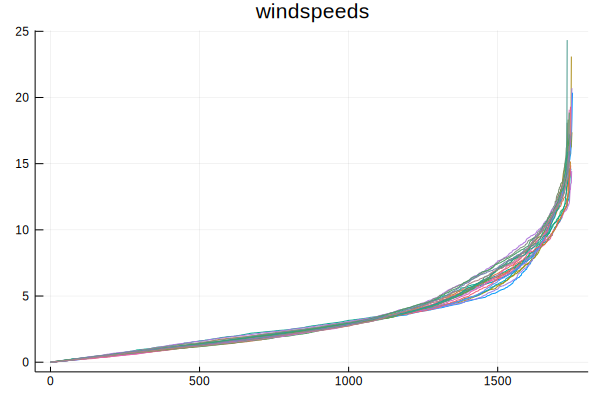

In [5]:
# this looks like we have m/s
plot([data[t].nzval |> sort for t=1:24], title = "windspeeds", legend=false)

In [7]:
Q=data[1]
sum(Q, dims=2)

900×1 Array{Float64,2}:
 4.614026069641113 
 4.387370586395264 
 3.835463285446167 
 3.290660381317139 
 2.996273517608643 
 2.742378711700439 
 2.497782468795776 
 2.319708347320557 
 2.369681835174561 
 2.414822816848755 
 3.4131775498390198
 3.0936639308929443
 2.6761974096298218
 ⋮                 
 6.30475015938282  
 7.648987770080566 
 7.673932075500488 
 9.370419979095459 
 8.387326955795288 
 5.979031324386596 
 4.710607647895813 
 4.459028303623199 
 4.572177886962891 
 5.774473190307617 
 5.048812389373779 
 5.19192361831665  

In [ ]:
sum(data[1])